In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
from sklearn.cluster import KMeans

In [2]:
img_path = "../results/player_1.png"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

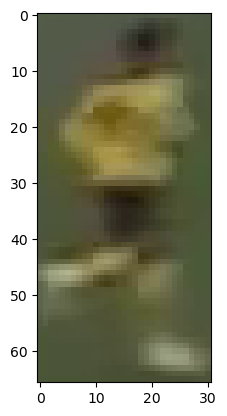

In [3]:
plt.imshow(img)
plt.show()

# Cluster img into two clusters
Reshape into 2D

In [4]:
img_2d = img.reshape(-1, 3) #3 channels (RGB)
kmeans = KMeans(n_clusters=2, random_state=0).fit(img_2d) #2 clusters for ease of visualization
labels = kmeans.labels_

Reshape into original img shape

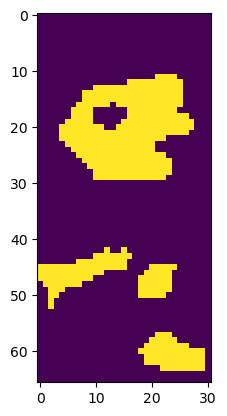

In [5]:
clustered_img = labels.reshape(img.shape[0], img.shape[1])
plt.imshow(clustered_img)
plt.show()

It seems as if the top-half of the image is the valuable part (different shirt colors)
Let us crop the image.

c:\Users\Oscar\.conda\envs\torchenv_3.11\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


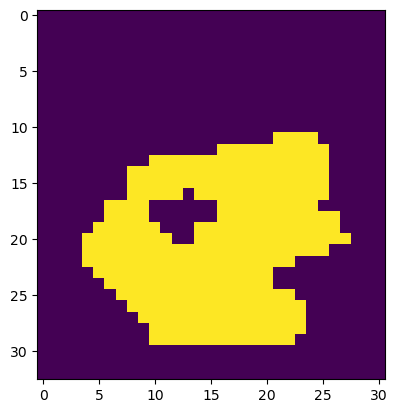

In [6]:
img = img[0: int(img.shape[0]/2), :]

img_2d = img.reshape(-1, 3) #3 channels (RGB)
kmeans = KMeans(n_clusters=2, random_state=0).fit(img_2d)
labels = kmeans.labels_
clustered_img = labels.reshape(img.shape[0], img.shape[1])
plt.imshow(clustered_img)
plt.show()

Get average color of the player

In [13]:
#As we don't know if class 0 is the background or the player, we will check which class is found in the corners of the image
corner_cluster = [clustered_img[0, 0], clustered_img[0, -1], clustered_img[-1, 0], clustered_img[-1, -1]]
bg_cluster = max(set(corner_cluster), key = corner_cluster.count)
player_cluster = 1 - bg_cluster
print(f"Background cluster: {bg_cluster}")
print(f"Player cluster: {player_cluster}")

Background cluster: 0
Player cluster: 1


In [18]:
player_center = np.mean(img[clustered_img == player_cluster], axis=0)
print(f"Player center has color (RGB): {player_center}")

Player center has color (RGB): [138.12080537 127.73154362  70.83557047]


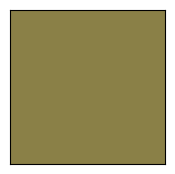

In [20]:
fig, ax = plt.subplots(figsize=(2, 2))
ax.set_facecolor(player_center / 255)
ax.set_xticks([])
ax.set_yticks([])
plt.show()